# Solution proposal random motion

In [1]:
# ignore this line, it's for showing plots within this script.
%pylab inline

Populating the interactive namespace from numpy and matplotlib


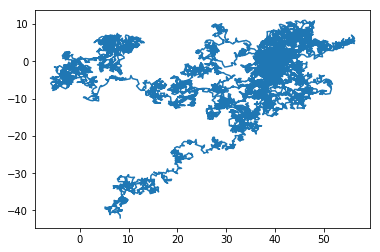

In [2]:
import random
import math

def random_walk(n, x0=0, y0=0):
    
    x_values = [x0]
    y_values = [y0]
    
    for i in range(n - 1):
        phi = 2 * math.pi * random.random()
        r = random.random()
        x_new = x_values[-1] + math.cos(phi) * r
        y_new = y_values[-1] + math.sin(phi) * r
        
        x_values.append(x_new)
        y_values.append(y_new)
        
    return x_values, y_values
  
x_values, y_values = random_walk(10000)
plt.plot(x_values, y_values)

In [3]:
# rough timing

import time
started = time.time()
random_walk(1000000)
needed = time.time() - started

print(needed)

1.0160818099975586


`numpy` is optimized for array and matrix operation, so addition like:

In [4]:
a = np.arange(10)
b = np.arange(10)
c = a + b

Is not only shorter, but also faster than manual looping:

In [5]:
c = np.zeros(10)
for i in range(10):
    c[i] = a[i] + b[i]

So our goal is to get rid of the `for` loop. The tricky part is to implement the updates of `x` and `y`.

`np.cumsum` (cumulative sum) which transforms an array `[x0, x1, x2, ..]` to `[x0, x0 + x1, x0 + x1 + x2, ...]` helps us:

In [6]:
print(np.cumsum([1, 2, 1, 3]))

[1 3 4 7]


In [7]:
import numpy as np
import matplotlib.pyplot as p


def random_walk_fast(n, x0=0, y0=0):
    """optimized version using numpy features.
    
    idea: we first create vectors with the updates for x and y
    and finally np.cumsum() to compute the wanted result.
    """
    
    phi_values = np.random.rand(n - 1) * 2 * np.pi
    
    cos_values = np.cos(phi_values)
    sin_values = np.sin(phi_values)
    
    r_values = np.random.random(n - 1)
    
    x_updates = np.zeros(n)
    x_updates[0] = x0
    x_updates[1:] = r_values * cos_values
    
    y_updates = np.zeros(n)
    y_updates[0] = y0
    y_updates[1:] = r_values * sin_values
    
    x_values = np.cumsum(x_updates)
    y_values = np.cumsum(y_updates)
    return x_values, y_values

In [8]:
# rough timing

import time
started = time.time()
x_values, y_values = random_walk_fast(1000000)
needed = time.time() - started

print(needed)

0.10500979423522949


So the optimized function is about 10x faster, but for the cost of decreased readability for non `numpy` experts.

## "premature optimization is the cause of all evil"

https://shreevatsa.wordpress.com/2008/05/16/premature-optimization-is-the-root-of-all-evil/

This does not mean not to optimize, but optimization often reduces code readability, and sometimes structure. So:

- first focus on a well written, tested and correct program
- then measure to find the slow parts
- then optimize only those

**Don't guess what parts are slow, measure ! Most such guesses are wrong.**

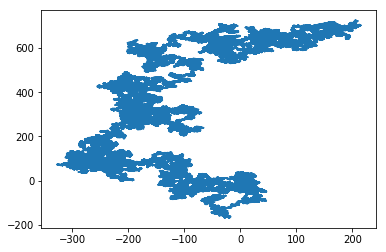

In [9]:
plt.plot(x_values, y_values)

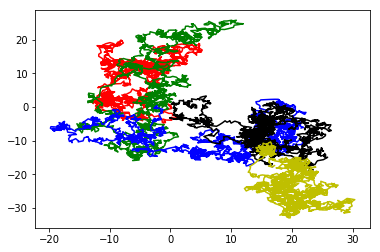

In [14]:
def plot_random_walk(x_values, y_values, block_size=2000, colors="RGBKY"):
  
    n = len(x_values)
    assert len(y_values) == n
    
    for block_number, block_start in enumerate(range(0, n, block_size)):
        
        color = colors[block_number % len(colors)]  # wrap around 
        
        x_block = x_values[block_start: block_start + block_size]
        y_block = y_values[block_start: block_start + block_size]
        
        pylab.plot(x_block, y_block, color)
        
x_values, y_values= random_walk_fast(10000)
plot_random_walk(x_values, y_values)

Btw: we can use indices beyond the length of an array:

In [18]:
x = np.arange(8)
print(x[5:10])

[5 6 7]


In [12]:
#REMOVEBEGIN
# THE LINES BELOW ARE JUST FOR FORMATTING THE INSTRUCTIONS ABOVE !
from IPython import utils, paths
from IPython.core.display import HTML
import os
def css_styling():
    """Load default custom.css file from ipython profile"""
    # base = utils.path.get_ipython_dir()
    base = paths.get_ipython_dir()
    styles = """<style>
    
    @import url('http://fonts.googleapis.com/css?family=Source+Code+Pro');
    
    @import url('http://fonts.googleapis.com/css?family=Kameron');
    @import url('http://fonts.googleapis.com/css?family=Crimson+Text');
    
    @import url('http://fonts.googleapis.com/css?family=Lato');
    @import url('http://fonts.googleapis.com/css?family=Source+Sans+Pro');
    
    @import url('http://fonts.googleapis.com/css?family=Lora'); 

    
    body {
        font-family: 'Lora', Consolas, sans-serif;
      
    }
    .rendered_html code
    {
        color: black;
        background: #eaf0ff;
        padding: 1pt;
        font-family:  'Source Code Pro', Consolas, monocco, monospace;
    }
    
    .CodeMirror pre {
    font-family: 'Source Code Pro', monocco, Consolas, monocco, monospace;
    }
    
    .cm-s-ipython span.cm-keyword {
        font-weight: normal;
     }
     
     strong {
         background: #ffe7e7;
         padding: 1pt;
     }
     
    
    div #notebook {
        # font-size: 10pt; 
        line-height: 145%;
        }
        
    li {
        line-heigt: 145%;
    }

    div.output_area pre {
        background: #fffdf0;
        padding: 3pt;
    }
    h1, h2, h3, h4 {
        font-family: Kameron, arial;
    }
    
    div#maintoolbar {display: none !important;}
    </style>"""
    return HTML(styles)
css_styling()
#REMOVEEND